In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

### develop a simple algorithm to detect the whales location

In [75]:
img = cv2.imread('/data/imgs_subset/w_90.jpg')

* Convert the image from RGB to HSV and only take the H value
* Apply a Laplacian filter to the H values which in effects take the derivative of each pixel

In [76]:
M = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H = M[:,:,0]
laplacian = cv2.Laplacian(H, cv2.CV_64F)

* create a plot of the different filters so we can visually inspect for now

In [77]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(4, 12)
ax1 = plt.subplot(gs[:,:4])
ax2 = plt.subplot(gs[:, 4:8])
ax3 = plt.subplot(gs[:, 8:12])
ax1.imshow(img)
ax1.set_title('regular')
ax2.imshow(H)
ax2.set_title('gray')
ax3.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
ax3.set_title('hsv')
plt.tight_layout()

* apply a kmeans cluster on the derivitive values greater than 80

In [78]:
y,x = np.where(laplacian>80)
z = np.vstack([x,y])

from sklearn.cluster import KMeans
spec = KMeans(n_clusters=20)
clusters = spec.fit_predict(z.transpose())

* Find the kmeans clusters which have a number of points in the 80 percentile

In [79]:
large_cluster_index = np.where(np.bincount(clusters) >np.percentile(np.bincount(clusters),80))

* Make a plot showing where we have identified the whale to be located

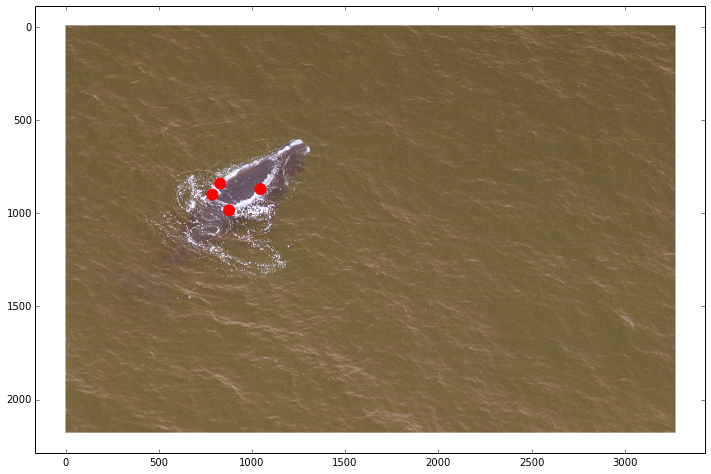

In [80]:
fig = plt.figure(figsize=(12,12))
plt.imshow(img)
#for key in keypoints:
#    plt.plot([key.pt[0]],[key.pt[1]],'bo', markersize=20,)
#y,x = np.where(laplacian>50)
#plt.scatter(x,y)
lci = large_cluster_index
plt.scatter(spec.cluster_centers_[lci,0],spec.cluster_centers_[lci,1],color='r',s=120)

In [4]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 1000;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 2000
 
# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.01
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

params.maxInertiaRatio = 1
detector = cv2.SimpleBlobDetector(params)
# Read image
#im = cv2.imread('/home/ubuntu/software/learnopencv/BlobDetector/blob.jpg', cv2.IMREAD_GRAYSCALE)
#im = H

# Detect blobs.
keypoints = detector.detect(H)